# Agenda
Data preprocessing is an important stage of data mining. In this exercise, we perform feature transformation as a preprocessing task. There are two main categories under feature transformation: feature normalization and feature discretization. This exercise illustrates a few transformation techniques under each category. The content for the remainder of this guide is as follows.

## Table of Contents
1. [Python Libraries](#libraries)  
    1.1. [Installing Python Libraries](#lib-install)  
    1.2. [Importing Python Libraries](#lib-import)  
2. [Loading (dummy) Data Set](#dataset)
3. [Feature Transformation](#transformation)  
    3.1. [Feature Normalization](#normalization)   
    3.2. [Feature Discretization](#discretization)  
4. [Exercise: Feature Transformation on UCI Data set](#exercise) 
  
    
# 1. Python Libraries <a name="libraries"></a>
## 1.1. Install Python libraries <a name="lib-install"></a>
This exercise will requires the following **Python** libraries:

<ul>
    <li><strong>numpy:</strong> numerical computations</li>
    <li><strong>pandas:</strong> data manipulation using DataFrames</li>
    <li><strong>scikit learn:</strong> predictive data analysis</li>
    <li><strong>matplotlib:</strong> plotting graphs</li>
    <li><strong>seaborn:</strong> nice graph visualization</li>
</ul>


In [1]:
# Installing Libraries (if not installed)
#! pip3 install matplotlib
#! pip3 install scikit-learn
#! pip3 install seaborn
#! pip3 install numpy
#! pip3 install pandas

## 1.2. Import libraries <a name="lib-import"></a>

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading (dummy) Data Set <a name="dataset"></a>
In this section, we load a dummy data set into a Pandas DataFrame.

1. upload a dummy data set and 
2. load it into a Pandas DataFrame

In [3]:
df = pd.read_csv('sample_2.csv', sep=';')
df

,Gender,Age,Marks,Scholarship,Awards,Position
0,M,16,70.0,N,3,5
1,F,17,60.5,Y,5,10
2,F,15,90.2,Y,4,2
3,M,14,50.8,Y,2,13
4,M,18,40.0,Y,1,16
5,F,13,42.3,Y,2,14
6,M,15,41.6,N,3,15
7,M,15,53.9,N,4,12
8,M,16,54.1,Y,2,11
9,F,14,65.7,N,1,8


# 3. Feature Transformation <a name="transformation"></a>
This exercise is adopted from:

* [How To Discretize a Variable in Python](https://cmdlinetips.com/2019/12/how-to-discretize-bin-a-variable-in-python/) and  
* [Hands-on with Feature Engineering Techniques](https://heartbeat.fritz.ai/hands-on-with-feature-engineering-techniques-variable-discretization-7deb6a5c6e27)

## 3.1. Feature Normalization <a name="normalization"></a>

In this section, we normalize the dummy data set using the following techniques:
1. decimal scaling  
2. Min-Max scaling  
3. Z-score normalization  

### 3.1.1 Decimal Scaling <a name="decimal"></a>
To normalize our data using the Decimal scaling, we use a **for-loop** that computes the decimal values of each data point.

In [4]:
X = df[['Age','Marks','Awards','Position']]
print(X)

X_scale = X.copy()

# for x in df:
for var in X_scale:
    max_ = X_scale[var].max()
    j = len(str(abs(int(max_))))
    X_scale[var] = X_scale[var]/10**j
    
    
X_scale = pd.DataFrame(data=X_scale, columns=['Age','Marks','Awards','Position'])

print()
print(X_scale)

    Age  Marks  Awards  Position
0    16   70.0       3         5
1    17   60.5       5        10
2    15   90.2       4         2
3    14   50.8       2        13
4    18   40.0       1        16
5    13   42.3       2        14
6    15   41.6       3        15
7    15   53.9       4        12
8    16   54.1       2        11
9    14   65.7       1         8
10   15   72.8       2         4
11   16   85.0       3         3
12   16   32.0       4        17
13   18   67.4       5         7
14   15   27.9       2        18
15   16   68.8       3         6
16   13   64.2       1         9
17   18   92.7       4         1

     Age  Marks  Awards  Position
0   0.16  0.700     0.3      0.05
1   0.17  0.605     0.5      0.10
2   0.15  0.902     0.4      0.02
3   0.14  0.508     0.2      0.13
4   0.18  0.400     0.1      0.16
5   0.13  0.423     0.2      0.14
6   0.15  0.416     0.3      0.15
7   0.15  0.539     0.4      0.12
8   0.16  0.541     0.2      0.11
9   0.14  0.657     0.1      0.0

### 3.1.2. Min-Max Scaling <a name="min-max"></a>
To normalize your data, we import the **MinMaxScalar** from the **_sklearn_** library and apply it to our dataset. 

In [5]:
print(X)

# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X)

# transform training data
X_norm = norm.transform(X)

X_norm = pd.DataFrame(data=X_norm, columns=['Age','Marks','Awards','Position'])

print()
print(X_norm)

    Age  Marks  Awards  Position
0    16   70.0       3         5
1    17   60.5       5        10
2    15   90.2       4         2
3    14   50.8       2        13
4    18   40.0       1        16
5    13   42.3       2        14
6    15   41.6       3        15
7    15   53.9       4        12
8    16   54.1       2        11
9    14   65.7       1         8
10   15   72.8       2         4
11   16   85.0       3         3
12   16   32.0       4        17
13   18   67.4       5         7
14   15   27.9       2        18
15   16   68.8       3         6
16   13   64.2       1         9
17   18   92.7       4         1

    Age     Marks  Awards  Position
0   0.6  0.649691    0.50  0.235294
1   0.8  0.503086    1.00  0.529412
2   0.4  0.961420    0.75  0.058824
3   0.2  0.353395    0.25  0.705882
4   1.0  0.186728    0.00  0.882353
5   0.0  0.222222    0.25  0.764706
6   0.4  0.211420    0.50  0.823529
7   0.4  0.401235    0.75  0.647059
8   0.6  0.404321    0.25  0.588235
9   0.2  0.5

### 3.1.3. Z-score Normalization <a name="z-score"></a>
To normalize your data, we import the **StandardScalar** from the **_sklearn_** library and apply it to our dataset. 

In [6]:
print(X)

from sklearn.preprocessing import StandardScaler

# copy of datasets
X_stand = X.copy()

# apply standardization on numerical features
for var in X_stand:
    
    # fit on training data column
    scale = StandardScaler().fit(X_stand[[var]])
    
    # transform the training data column
    X_stand[var] = scale.transform(X_stand[[var]])

    
X_stand = pd.DataFrame(data=X_stand, columns=['Age','Marks','Awards','Position'])

print()
print(X_stand)

    Age  Marks  Awards  Position
0    16   70.0       3         5
1    17   60.5       5        10
2    15   90.2       4         2
3    14   50.8       2        13
4    18   40.0       1        16
5    13   42.3       2        14
6    15   41.6       3        15
7    15   53.9       4        12
8    16   54.1       2        11
9    14   65.7       1         8
10   15   72.8       2         4
11   16   85.0       3         3
12   16   32.0       4        17
13   18   67.4       5         7
14   15   27.9       2        18
15   16   68.8       3         6
16   13   64.2       1         9
17   18   92.7       4         1

         Age     Marks    Awards  Position
0   0.296500  0.544603  0.132453 -0.867365
1   0.963624  0.027517  1.721892  0.096374
2  -0.370625  1.644092  0.927173 -1.445608
3  -1.037749 -0.500455 -0.662266  0.674617
4   1.630748 -1.088300 -1.456986  1.252861
5  -1.704873 -0.963110 -0.662266  0.867365
6  -0.370625 -1.001212  0.132453  1.060113
7  -0.370625 -0.331721  0.92

## 3.2. Feature Discretization <a name="discretization"></a>

In this section, we discretisize the dummy data set using the following techniques:
1. Binning
2. Histogram Analysis
3. Clustering

### 3.2.1. Binning Technique <a name="binning"></a>
We use Pandas **_cut()_** function to categorize **Marks** variable into 4 bins:
* 0-40
* 40-50
* 50-70
* 70-100

We save the discretized data into a new variable **Grade**.

In [7]:
df['Range']=pd.cut(x=df['Marks'], bins=[0,40,50,70,100])
df

,Gender,Age,Marks,Scholarship,Awards,Position,Range
0,M,16,70.0,N,3,5,"(50, 70]"
1,F,17,60.5,Y,5,10,"(50, 70]"
2,F,15,90.2,Y,4,2,"(70, 100]"
3,M,14,50.8,Y,2,13,"(50, 70]"
4,M,18,40.0,Y,1,16,"(0, 40]"
5,F,13,42.3,Y,2,14,"(40, 50]"
6,M,15,41.6,N,3,15,"(40, 50]"
7,M,15,53.9,N,4,12,"(50, 70]"
8,M,16,54.1,Y,2,11,"(50, 70]"
9,F,14,65.7,N,1,8,"(50, 70]"


We add labels to the categories and save them in variable **Label**

In [8]:
df['Label']=pd.cut(x = df['Marks'],
                        bins = [0,40,50,70,150], 
                        labels = ['D', 'C', 'B', 'A'])
df

,Gender,Age,Marks,Scholarship,Awards,Position,Range,Label
0,M,16,70.0,N,3,5,"(50, 70]",B
1,F,17,60.5,Y,5,10,"(50, 70]",B
2,F,15,90.2,Y,4,2,"(70, 100]",A
3,M,14,50.8,Y,2,13,"(50, 70]",B
4,M,18,40.0,Y,1,16,"(0, 40]",D
5,F,13,42.3,Y,2,14,"(40, 50]",C
6,M,15,41.6,N,3,15,"(40, 50]",C
7,M,15,53.9,N,4,12,"(50, 70]",B
8,M,16,54.1,Y,2,11,"(50, 70]",B
9,F,14,65.7,N,1,8,"(50, 70]",B


### 3.2.2. Histogram Analysis <a name="histogram"></a>
The **Marks** variable is continuos. We plot a histogram to see how it would like in a discrete form.


0     70.0
1     60.5
2     90.2
3     50.8
4     40.0
5     42.3
6     41.6
7     53.9
8     54.1
9     65.7
10    72.8
11    85.0
12    32.0
13    67.4
14    27.9
15    68.8
16    64.2
17    92.7
Name: Marks, dtype: float64


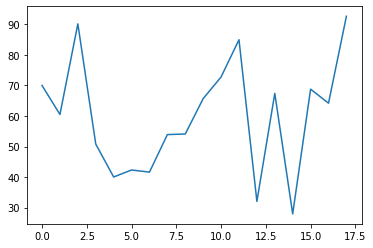

In [9]:
print(df['Marks'])
plt.plot(range(18), df['Marks'])
plt.show()

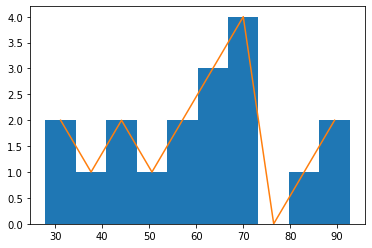

In [10]:
n,x,_ = plt.hist(df['Marks'])

bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n) ## using bin_centers rather than edges

plt.show()

### 3.2.3. Clustering <a name="clustering"></a>
We applying k-means clustering to the continuous **Age, Marks, Awards, Position** variables to form clusters; and each cluster is considered as a bin.

* We plot a scatter plot of **Marks** variable against itself to observe the clusters.

<AxesSubplot:xlabel='Marks', ylabel='Marks'>

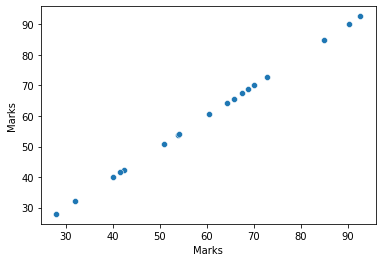

In [11]:
sns.scatterplot(data=df, x='Marks', y='Marks')

To discretize our data, we import the **KBinsDiscretizer** from the **_sklearn_** library and apply it to our dataset.

* We first choose 5 clusters (data will be grouped into 5 clusters depending on similarity). We can change this number to gain more granularity.

In [12]:
print(X)

from sklearn.preprocessing import KBinsDiscretizer


# create the discretizer object with strategy quantile and 8 bins
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans') 

# fit the discretizer to the train set
discretizer.fit(X)

# apply the discretisation
X_cluster = discretizer.transform(X)

X_cluster = pd.DataFrame(data=X_cluster, columns=['Age','Marks','Awards','Position'])

print()
print(X_cluster)

    Age  Marks  Awards  Position
0    16   70.0       3         5
1    17   60.5       5        10
2    15   90.2       4         2
3    14   50.8       2        13
4    18   40.0       1        16
5    13   42.3       2        14
6    15   41.6       3        15
7    15   53.9       4        12
8    16   54.1       2        11
9    14   65.7       1         8
10   15   72.8       2         4
11   16   85.0       3         3
12   16   32.0       4        17
13   18   67.4       5         7
14   15   27.9       2        18
15   16   68.8       3         6
16   13   64.2       1         9
17   18   92.7       4         1

    Age  Marks  Awards  Position
0   2.0    3.0     2.0       1.0
1   3.0    2.0     4.0       2.0
2   1.0    4.0     3.0       0.0
3   0.0    2.0     1.0       3.0
4   4.0    1.0     0.0       4.0
5   0.0    1.0     1.0       3.0
6   1.0    1.0     2.0       4.0
7   1.0    2.0     3.0       3.0
8   2.0    2.0     1.0       2.0
9   0.0    3.0     0.0       2.0
10  1.0  

# 4. Exercise: Feature Transformation on UCI Data set <a name="exercise"></a>
The [PRSA_Data.csv](../OLAP/PRSA_Data.csv) is retrieved from [UCI Data Repository](https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data). The data (**Beijing Multi-Site Air-Quality Data Data Set**): is hourly data set considers 6 main air pollutants and 6 relevant meteorological variables at multiple sites in Beijing. Using this data set, apply:

1. Feature normalization using *Z-Score* technique
2. Feature discretization using *Binning* and *Clustering* techniques.
